In [8]:
import json

data = dict();

with open("mobilePaymentData.json","r",encoding ="utf-8") as f:
    d = f.read()
    data = json.loads(d)
    
tweets = list()
for info in data["data"]:
    d = json.loads(info)
    tweets.append(d["text"])
print(tweets)

["*PAYMENT CONFIRM FROM GHANA THROUGH MOBILE MONEY TRANSFER FOR TODAY'S SUBSCRIPTION* https://t.co/1OvRXmMkLe", 'Effect of mobile phone-based health insurance contribution payment system on retention of coverage in the National Health Insurance Scheme in Ghana: an evaluation study #preprints https://t.co/hqvoNUpksQ', "RT @meiphya_: (.@PayAngelMoney) if you're looking at transacting mobile money in Ghana and want to avoid E-Levy, then go with #PayAngel. It…", 'RT @Elninotorres30: Buy BTC and USDT with mobile money in Ghana at the best rates. Sell and withdraw bitcoin to mobile money instantly on Y…', 'RT @cyvsela: Ghana today; 1. @NCAGhana \'s sim self reg app is "double charging" for one registration with "error feedback" after payment is…', 'Ghana today; 1. @NCAGhana \'s sim self reg app is "double charging" for one registration with "error feedback" after payment is made.\n\n2. It has now become the norm- all mobile money transfers are taxed including the first 0-100 cedis.\nWhy is t

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [10]:
tweets_df = pd.DataFrame(tweets, index=None,columns=["Tweets"])
tweets_df.head()

,Tweets
0,*PAYMENT CONFIRM FROM GHANA THROUGH MOBILE MON...
1,Effect of mobile phone-based health insurance ...
2,RT @meiphya_: (.@PayAngelMoney) if you're look...
3,RT @Elninotorres30: Buy BTC and USDT with mobi...
4,RT @cyvsela: Ghana today; 1. @NCAGhana 's sim ...


In [11]:
#removing #, @ and links 
# removing hashtags
def remove_hashtags(text):
    hashtag = re.compile("#")
    return hashtag.sub("", text)

#removing @ symbols
def remove_at(text):
    at = re.compile("@")
    return at.sub("", text)

# removing links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
def get_words(text):
    return (text)

tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_at)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_hashtags)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_URL)

tweets_df.head()

,Tweets
0,*PAYMENT CONFIRM FROM GHANA THROUGH MOBILE MON...
1,Effect of mobile phone-based health insurance ...
2,RT meiphya_: (.PayAngelMoney) if you're lookin...
3,RT Elninotorres30: Buy BTC and USDT with mobil...
4,RT cyvsela: Ghana today; 1. NCAGhana 's sim se...


In [12]:
#removing stopwords

stop_words = set(stopwords.words('english'))

for i in range(tweets_df.shape[0]):
    # tokenizing words in each tweet
    words = word_tokenize(tweets_df["Tweets"][i])
    # joining the tokens to form a sentence
    tokens = [word for word in words if word not in stop_words]
    clean_tokens =" ".join([word for word in words if word.isalnum()])
    tweets_df["Tweets"][i] = clean_tokens
    
tweets_df

,Tweets
0,PAYMENT CONFIRM FROM GHANA THROUGH MOBILE MONE...
1,Effect of mobile health insurance contribution...
2,RT if you looking at transacting mobile money ...
3,RT Elninotorres30 Buy BTC and USDT with mobile...
4,RT cyvsela Ghana today 1 NCAGhana sim self reg...
5,Ghana today 1 NCAGhana sim self reg app is dou...
6,RT Elninotorres30 Buy BTC and USDT with mobile...
7,RT Elninotorres30 Buy BTC and USDT with mobile...
8,RT Elninotorres30 Buy BTC and USDT with mobile...
9,RT Elninotorres30 Buy BTC and USDT with mobile...


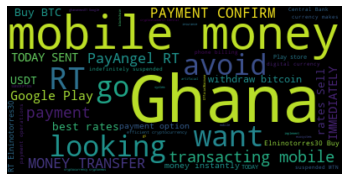

<Figure size 1152x576 with 0 Axes>

In [13]:
from wordcloud import WordCloud

def get_words(text):
    return (text)


words = " ".join(tweets_df["Tweets"].apply(get_words))
cloud = WordCloud(background_color="black").generate(words)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(16, 8))

plt.show()


In [14]:
from textblob import TextBlob

def check_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def check_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


tweets_df["Subjectivity Score"] = tweets_df["Tweets"].apply(check_sentiment_subjectivity)
tweets_df["Polarity Score"] = tweets_df["Tweets"].apply(check_sentiment_polarity)

tweets_df

,Tweets,Subjectivity Score,Polarity Score
0,PAYMENT CONFIRM FROM GHANA THROUGH MOBILE MONE...,0.000000,0.000000
1,Effect of mobile health insurance contribution...,0.000000,0.000000
2,RT if you looking at transacting mobile money ...,0.000000,0.000000
3,RT Elninotorres30 Buy BTC and USDT with mobile...,0.483333,0.500000
4,RT cyvsela Ghana today 1 NCAGhana sim self reg...,0.000000,0.000000
5,Ghana today 1 NCAGhana sim self reg app is dou...,0.166667,0.125000
6,RT Elninotorres30 Buy BTC and USDT with mobile...,0.483333,0.500000
7,RT Elninotorres30 Buy BTC and USDT with mobile...,0.483333,0.500000
8,RT Elninotorres30 Buy BTC and USDT with mobile...,0.483333,0.500000
9,RT Elninotorres30 Buy BTC and USDT with mobile...,0.483333,0.500000


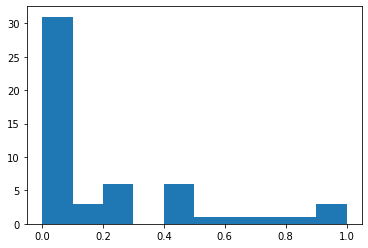

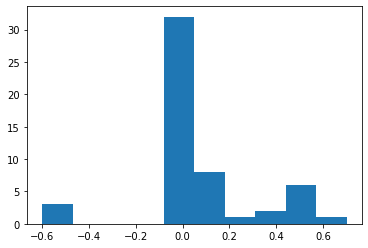

In [15]:
#ploting the sentiment scores
plt.hist(tweets_df["Subjectivity Score"])
plt.show()
plt.hist(tweets_df["Polarity Score"])
plt.show()